<a href="https://colab.research.google.com/github/s-i-d-d-h-a-r-t-h/Yolo/blob/main/YoloV3_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Checking if the NVIDIA GPU is enabled or not.   
!nvidia-smi

Sat Jun 26 11:15:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Mounting google drive.
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
#!ls /mydrive

Mounted at /content/gdrive


In [ ]:
#Cloning darknet.
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15138, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 15138 (delta 29), reused 50 (delta 23), pack-reused 15073
Receiving objects: 100% (15138/15138), 13.47 MiB | 20.43 MiB/s, done.
Resolving deltas: 100% (10274/10274), done.


In [ ]:
#Compiling darknet using NVIDIA GPU.
#Change @makefile to have GPU, OPENCV and CUDNN enabled.
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile 
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
           

In [ ]:
#Configuring darknet architecture for training.
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg

- batch = 64, subdivisions = 16
- minibatch size = 64/16 = 4
- epoch = 320/4 = 80
- filters= (no. of classes + 5)x3 = (1+5)x3 = 18

In [ ]:
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 4000/' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=18@' cfg/yolov3_training.cfg

In [ ]:
#Creating folder on google drive to save custom trained weights.
!mkdir "/mydrive/yolov3"

mkdir: cannot create directory ‘/mydrive/yolov3’: File exists


In [ ]:
#Remove 'data' folder, if already present inside the darknet folder and create a new 'data' folder.
!rm -rf data
!mkdir data

In [ ]:
!echo "Koala" > data/obj.names
#printing our class name i.e, 'Koala' into the file 'obj.names' in darknet/data/obj folder.

!echo -e 'classes= 1\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /mydrive/yolov3' > data/obj.data
#All these info will be written in the file 'obj.data' in darknet/data/obj folder.

!mkdir data/obj
#Creating folder obj in darknet/data folder.

In [ ]:
#Downloading pre-trained weights
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2021-06-26 11:26:49--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   101MB/s    in 1.5s    

2021-06-26 11:26:51 (101 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
#Extracting train and test images present in the images.zip on drive.
!unzip /mydrive/yolov3/images.zip -d data/obj

Archive:  /mydrive/yolov3/images.zip
  inflating: data/obj/160610-specials-TOS-koala-misnomer-thumbnailA_x45116_640x360_785218115604.jpg  
 extracting: data/obj/160610-specials-TOS-koala-misnomer-thumbnailA_x45116_640x360_785218115604.txt  
  inflating: data/obj/1feaf3250664c9e4e0a58e87f0e92430.jpg  
 extracting: data/obj/1feaf3250664c9e4e0a58e87f0e92430.txt  
  inflating: data/obj/animals_hero_koala02 copy.jpg  
  inflating: data/obj/animals_hero_koala02 copy.txt  
  inflating: data/obj/Are-koalas-heading-towards-extinction-730x410.jpg  
  inflating: data/obj/Are-koalas-heading-towards-extinction-730x410.txt  
 extracting: data/obj/img1.jpg       
  inflating: data/obj/img1.txt       
  inflating: data/obj/img2.jpg       
  inflating: data/obj/img2.txt       
  inflating: data/obj/img3.jpg       
  inflating: data/obj/img3.txt       
  inflating: data/obj/koala-bear-760.jpg  
  inflating: data/obj/koala-bear-760.txt  
  inflating: data/obj/koala.jpg      
  inflating: data/obj/koala.t

In [ ]:
!unzip /mydrive/yolov3/images_test.zip -d data/test

Archive:  /mydrive/yolov3/images_test.zip
  inflating: data/test/cure-koala.jpg  
 extracting: data/test/cure-koala.txt  
  inflating: data/test/DR_2020-01-18_Koroit-Victoria-AU_Bushfires-MosswoodWildlife-RescuedKoalas_1D_MelanieMahoney_094V1176.jpg  
  inflating: data/test/DR_2020-01-18_Koroit-Victoria-AU_Bushfires-MosswoodWildlife-RescuedKoalas_1D_MelanieMahoney_094V1176.txt  
  inflating: data/test/dsc1701_2.jpg  
  inflating: data/test/dsc1701_2.txt  
  inflating: data/test/file-20191009-3856-w0x4ri.jpg  
  inflating: data/test/file-20191009-3856-w0x4ri.txt  
 extracting: data/test/koalas.jpg    
 extracting: data/test/koalas.txt    
  inflating: data/test/maxresdefault.jpg  
 extracting: data/test/maxresdefault.txt  
  inflating: data/test/unwell-koalas.jpg  
  inflating: data/test/unwell-koalas.txt  
  inflating: data/test/what-is-stemflow.jpg  
  inflating: data/test/what-is-stemflow.txt  


In [ ]:
#Converting class index to '0', as there is only one class.
import glob
import os
import re

txt_file_paths = glob.glob(r"data/obj/*.txt")
for i, file_path in enumerate(txt_file_paths):
    # get image size
    with open(file_path, "r") as f_o:
        lines = f_o.readlines()

        text_converted = []
        for line in lines:
            print(line)
            numbers = re.findall("[0-9.]+", line)
            print(numbers)
            if numbers:

                # Define coordinates
                text = "{} {} {} {} {}".format(0, numbers[1], numbers[2], numbers[3], numbers[4])
                text_converted.append(text)
                print(i, file_path)
                print(text)
                
        # Write file
        with open(file_path, 'w') as fp:
            for item in text_converted:
                fp.writelines("%s\n" % item)

#Same for test images:
txt_file_paths = glob.glob(r"data/test/*.txt")
for i, file_path in enumerate(txt_file_paths):
    # get image size
    with open(file_path, "r") as f_o:
        lines = f_o.readlines()

        text_converted = []
        for line in lines:
            print(line)
            numbers = re.findall("[0-9.]+", line)
            print(numbers)
            if numbers:

                # Define coordinates
                text = "{} {} {} {} {}".format(0, numbers[1], numbers[2], numbers[3], numbers[4])
                text_converted.append(text)
                print(i, file_path)
                print(text)
                
        # Write file
        with open(file_path, 'w') as fp:
            for item in text_converted:
                fp.writelines("%s\n" % item)


15 0.503127 0.480312 0.959343 0.789375

['15', '0.503127', '0.480312', '0.959343', '0.789375']
0 data/obj/img1.txt
0 0.503127 0.480312 0.959343 0.789375
15 0.499195 0.514368 0.966184 0.877395

['15', '0.499195', '0.514368', '0.966184', '0.877395']
1 data/obj/1feaf3250664c9e4e0a58e87f0e92430.txt
0 0.499195 0.514368 0.966184 0.877395
15 0.300781 0.514352 0.540104 0.886111

['15', '0.300781', '0.514352', '0.540104', '0.886111']
2 data/obj/animals_hero_koala02 copy.txt
0 0.300781 0.514352 0.540104 0.886111
15 0.486986 0.513415 0.549315 0.880488

['15', '0.486986', '0.513415', '0.549315', '0.880488']
3 data/obj/Are-koalas-heading-towards-extinction-730x410.txt
0 0.486986 0.513415 0.549315 0.880488
15 0.592500 0.560556 0.368750 0.767778

['15', '0.592500', '0.560556', '0.368750', '0.767778']
4 data/obj/koala.txt
0 0.592500 0.560556 0.368750 0.767778
15 0.587500 0.485625 0.533333 0.793750

['15', '0.587500', '0.485625', '0.533333', '0.793750']
5 data/obj/Science_climatedesk_koalas_1199309062.

In [ ]:
import glob
images_list = glob.glob("data/obj/*.jpg")
print(images_list)
print('No. of train images - ', len(images_list))

['data/obj/Science_climatedesk_koalas_1199309062.jpg', 'data/obj/koala-bear-760.jpg', 'data/obj/_85718063_000327593-1.jpg', 'data/obj/1feaf3250664c9e4e0a58e87f0e92430.jpg', 'data/obj/img3.jpg', 'data/obj/animals_hero_koala02 copy.jpg', 'data/obj/img1.jpg', 'data/obj/Koala775x515-ae33660c-7425-466f-a85c-51496370c036.jpg', 'data/obj/Are-koalas-heading-towards-extinction-730x410.jpg', 'data/obj/img2.jpg', 'data/obj/160610-specials-TOS-koala-misnomer-thumbnailA_x45116_640x360_785218115604.jpg', 'data/obj/koala.jpg']
No. of train images -  12


In [ ]:
#Create train.txt file containing train images.
file = open("data/train.txt", "w")
file.write("\n".join(images_list)) 
file.close() 

In [ ]:
import glob
images_list_test = glob.glob("data/test/*.jpg")
print(images_list_test)
print('No. of train images - ', len(images_list_test))

['data/test/unwell-koalas.jpg', 'data/test/what-is-stemflow.jpg', 'data/test/file-20191009-3856-w0x4ri.jpg', 'data/test/maxresdefault.jpg', 'data/test/cure-koala.jpg', 'data/test/dsc1701_2.jpg', 'data/test/koalas.jpg', 'data/test/DR_2020-01-18_Koroit-Victoria-AU_Bushfires-MosswoodWildlife-RescuedKoalas_1D_MelanieMahoney_094V1176.jpg']
No. of train images -  8


In [ ]:
#Create test.txt file containing test images.
file = open("data/test.txt", "w")
file.write("\n".join(images_list_test)) 
file.close() 

In [ ]:
#Model Training.
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 172231, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.913293), count: 4, class_loss = 0.000076, iou_loss = 0.061629, total_loss = 0.061705 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 172235, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.969661), count: 4, class_loss = 0.000005, iou_loss = 0.006183, total_loss = 0.006188 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (ms

This network creates a checkpoint after every 1000 epochs.
At last, 'last weights' file will be created which we have to use for making predictions.

For resuming the training from a checkpoint:

In [ ]:
#!./darknet detector train data/obj.data cfg/yolov3_training.cfg /mydrive/yolov3/yolov3_training_"xxxx".weights -dont_show #-map
#"xxxx" - last epoch checkpoint.

In [ ]:
#Checking Performance.
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

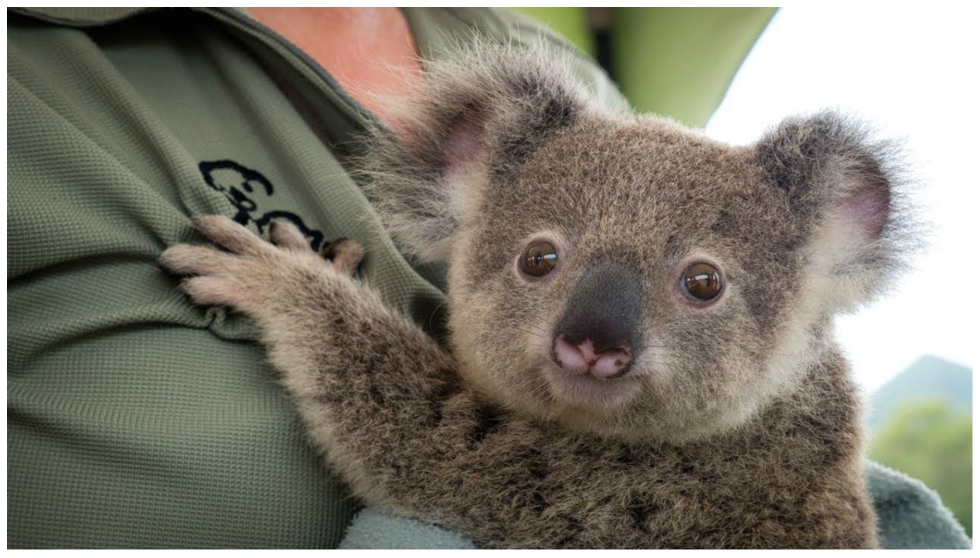

In [ ]:
imShow('data/test/maxresdefault.jpg')

MAP (Mean Average Precision):

In [ ]:
#Model Evaluation.
!./darknet detector map data/obj.data cfg/yolov3_training.cfg /mydrive/yolov3/yolov3_training_last.weights -points 0

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 